<a href="https://colab.research.google.com/github/plajuan/ML_Study/blob/main/Model_Evaluation_Cookbook.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Cookbook

## Model evaluation

Model evaluation is used in machine learning to assess the performance of predictive models. As such, the evaluation of models is an important step in the validation of the developed machine learning models.

In this cookbook, we'll look at a set of common techniques in model evaluation. Most of the illustrated techniques use the library [scikit-learn](http://scikit-learn.org/).

## Problem 1

Estimate the performance of a model using cross-validation.

### Solution

In [ ]:
# Import libraries
import pandas as pd

from sklearn import datasets
from sklearn import metrics
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import cross_val_score

In [ ]:
# Import data (scikit-learn)
digits = datasets.load_digits()

In [ ]:
# Create dataframe based on data imported from scikit-learn
df = pd.DataFrame(digits.data)
df['target'] = pd.Series(digits.target)
df.head()

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,40,41,42,43,44,45,46,47,48,49,50,51,52,53,54,55,56,57,58,59,60,61,62,63,target
0,0.0,0.0,5.0,13.0,9.0,1.0,0.0,0.0,0.0,0.0,13.0,15.0,10.0,15.0,5.0,0.0,0.0,3.0,15.0,2.0,0.0,11.0,8.0,0.0,0.0,4.0,12.0,0.0,0.0,8.0,8.0,0.0,0.0,5.0,8.0,0.0,0.0,9.0,8.0,0.0,0.0,4.0,11.0,0.0,1.0,12.0,7.0,0.0,0.0,2.0,14.0,5.0,10.0,12.0,0.0,0.0,0.0,0.0,6.0,13.0,10.0,0.0,0.0,0.0,0
1,0.0,0.0,0.0,12.0,13.0,5.0,0.0,0.0,0.0,0.0,0.0,11.0,16.0,9.0,0.0,0.0,0.0,0.0,3.0,15.0,16.0,6.0,0.0,0.0,0.0,7.0,15.0,16.0,16.0,2.0,0.0,0.0,0.0,0.0,1.0,16.0,16.0,3.0,0.0,0.0,0.0,0.0,1.0,16.0,16.0,6.0,0.0,0.0,0.0,0.0,1.0,16.0,16.0,6.0,0.0,0.0,0.0,0.0,0.0,11.0,16.0,10.0,0.0,0.0,1
2,0.0,0.0,0.0,4.0,15.0,12.0,0.0,0.0,0.0,0.0,3.0,16.0,15.0,14.0,0.0,0.0,0.0,0.0,8.0,13.0,8.0,16.0,0.0,0.0,0.0,0.0,1.0,6.0,15.0,11.0,0.0,0.0,0.0,1.0,8.0,13.0,15.0,1.0,0.0,0.0,0.0,9.0,16.0,16.0,5.0,0.0,0.0,0.0,0.0,3.0,13.0,16.0,16.0,11.0,5.0,0.0,0.0,0.0,0.0,3.0,11.0,16.0,9.0,0.0,2
3,0.0,0.0,7.0,15.0,13.0,1.0,0.0,0.0,0.0,8.0,13.0,6.0,15.0,4.0,0.0,0.0,0.0,2.0,1.0,13.0,13.0,0.0,0.0,0.0,0.0,0.0,2.0,15.0,11.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,12.0,12.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,10.0,8.0,0.0,0.0,0.0,8.0,4.0,5.0,14.0,9.0,0.0,0.0,0.0,7.0,13.0,13.0,9.0,0.0,0.0,3
4,0.0,0.0,0.0,1.0,11.0,0.0,0.0,0.0,0.0,0.0,0.0,7.0,8.0,0.0,0.0,0.0,0.0,0.0,1.0,13.0,6.0,2.0,2.0,0.0,0.0,0.0,7.0,15.0,0.0,9.0,8.0,0.0,0.0,5.0,16.0,10.0,0.0,16.0,6.0,0.0,0.0,4.0,15.0,16.0,13.0,16.0,1.0,0.0,0.0,0.0,0.0,3.0,15.0,10.0,0.0,0.0,0.0,0.0,0.0,2.0,16.0,4.0,0.0,0.0,4


In [ ]:
# Create model
model = RandomForestClassifier()

In [ ]:
# Divide into independent and dependent variables
X = df.drop('target', axis=1)
y = df['target']

In [ ]:
# Do 5 fold cross-validation
cross_val_score(model, X, y, cv=5)

array([0.93055556, 0.91666667, 0.96657382, 0.96100279, 0.93314763])

In [ ]:
# Estimate model performance based on cross-validation
cross_val_score(model, X, y, cv=5).mean()

0.9432606004333024

## Problem 2

Have a model against which we can compare our ranking model. This model must be as simple as possible, and its performance must act as a reference of the minimum performance that our model must have.

For example, if we have to guess whether a coin flip will come up heads or tails, a random model gives us a 50% chance of getting it right (there are only two possible outcomes). Therefore, a good forecasting model must, at least, have a predictive capacity above 50%.

### Solution

In [ ]:
# Import libraries
import pandas as pd

from sklearn import datasets
from sklearn.dummy import DummyClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import cross_val_score

In [ ]:
# Import data (scikit-learn)
iris = datasets.load_iris()

In [ ]:
# Create dataframe based on data imported from scikit-learn
df = pd.DataFrame(iris.data, columns=iris.feature_names)
df['target'] = pd.Series(iris.target)
df.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0


In [ ]:
# Create 'dummy' model
dummy = DummyClassifier(strategy='uniform')

* There are other strategies besides 'uniform'. They can be found in the [official documentation](https://scikit-learn.org/stable/modules/generated/sklearn.dummy.DummyClassifier.html?highlight=dummy%20classifier#sklearn.dummy.DummyClassifier).

In [ ]:
# Divide into independent and dependent variables
X = df.drop('target', axis=1)
y = df['target']

In [ ]:
# Estimate 'dummy' model performance
cross_val_score(dummy, X, y).mean()

0.3333333333333333

In [ ]:
# Create model with RandomForestClassifier
model = RandomForestClassifier()

In [ ]:
# Estimate new model performance
cross_val_score(model, X, y).mean()

0.96

## Problem 3

Have a model against which we can compare our regression model. This model must be as simple as possible, and its performance must act as a reference of the minimum performance that our model must have.

For example, if we want to predict tomorrow's temperature, saying that the temperature will be the same as yesterday is a model that probably won't fail much. Therefore, a good forecasting model must have a better forecasting capacity than a model as simple as the one mentioned above.

### Solution

In [ ]:
# Import libraries
import pandas as pd

from sklearn import datasets
from sklearn.dummy import DummyRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import cross_val_score

In [ ]:
# Import data (scikit-learn)
boston = datasets.load_boston()

In [ ]:
# Create dataframe based on data imported from scikit-learn
df = pd.DataFrame(boston.data, columns=boston.feature_names)
df['target'] = pd.Series(boston.target)
df.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,target
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33,36.2


In [ ]:
# Create 'dummy' model
dummy = DummyRegressor(strategy='mean')

* There are other strategies besides 'mean'. They can be found in the [official documentation](https://scikit-learn.org/stable/modules/generated/sklearn.dummy.DummyRegressor.html?highlight=dummy%20regressor#sklearn.dummy.DummyRegressor).

In [ ]:
# Divide into independent and dependent variables
X = df.drop('target', axis=1)
y = df['target']

In [ ]:
# Estimate 'dummy' model performance
cross_val_score(dummy, X, y).mean()

-0.7209557183189366

* The negative value is a strong sign that the model is unable to make predictions

In [ ]:
# Create model with RandomForestRegressor
model = RandomForestRegressor()

In [ ]:
# Estimate new model performance
cross_val_score(model, X, y).mean()

0.6196502889824143

## Problem 4

Assess the quality of a classification model, according to different assessment measures.

### Solution

In [ ]:
# Import libraries
from sklearn.datasets import make_classification
from sklearn.model_selection import cross_val_score
from sklearn.ensemble import RandomForestClassifier

In [ ]:
# Create artificial data
X, y = make_classification(n_samples = 10000,
                           n_features = 3,
                           n_informative = 3,
                           n_redundant = 0,
                           n_classes = 2,
                           random_state = 1)

* For more information on using `make_classification`, consult the [official documentation](https://scikit-learn.org/stable/modules/generated/sklearn.datasets.make_classification.html?highlight=make_classification#sklearn.datasets.make_classification).

In [ ]:
# Create model
model = RandomForestClassifier()

In [ ]:
# Estimate model performance with cross validation (success rate)
cross_val_score(model, X, y, scoring='accuracy').mean()

0.9718

* By default, most ranking models use success rate as an evaluation measure. The evaluation measure was only shown to follow the logic of the example.

In [ ]:
# Estimate model performance with cross-validation (precision)
cross_val_score(model, X, y, scoring='precision').mean()

0.9699299303217861

In [ ]:
# Estimate model performance with cross validation (sensitivity)
cross_val_score(model, X, y, scoring='recall').mean()

0.9724

In [ ]:
# Estimate model performance with cross-validation (F-score)
cross_val_score(model, X, y, scoring='f1').mean()

0.9717409389633108

## Problem 5

Evaluate, through the use of a confusion matrix, the performance of a classification model, taking into account different evaluation measures.

### Solution

In [ ]:
# Import bibliotecas
import pandas as pd

import matplotlib.pyplot as plt
import seaborn as sns

from sklearn import datasets
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import confusion_matrix

In [ ]:
# Import data (scikit-learn)
iris = datasets.load_iris()

In [ ]:
# Create dataframe based on data imported from scikit-learn
df = pd.DataFrame(iris.data, columns=iris.feature_names)
df['target'] = pd.Series(iris.target)
df.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0


In [ ]:
# Split into independent and dependent variables
X = df.drop('target', axis=1)
y = df['target']

In [ ]:
# Create training dataset and test dataset
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42)

In [ ]:
# Create model
model = RandomForestClassifier()

In [ ]:
# Trein model
model.fit(X_train, y_train)

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=None, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=100,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False)

In [ ]:
# Make predictions
y_pred = model.predict(X_test)

In [ ]:
# Create confusion matrix
matriz = confusion_matrix(y_test, y_pred)

In [ ]:
# Put the matrix in a panda dataframe
matriz_df = pd.DataFrame(matriz, index=iris.target_names, columns=iris.target_names)

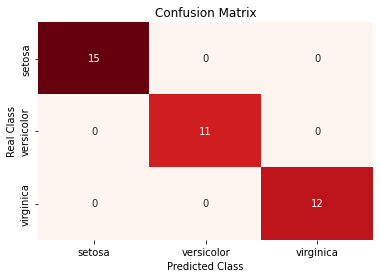

In [ ]:
# Create confusion matrix (adapt heat map)
sns.heatmap(matriz_df, annot=True, cbar=None, cmap="Reds")
plt.title("Confusion Matrix")
plt.ylabel("Real Class"), plt.xlabel("Predicted Class")
plt.show()

## Problem 6

Assess the quality of a regression model, according to different assessment measures.

### Solution

In [ ]:
# Import libraries
from sklearn.datasets import make_regression
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import cross_val_score

In [ ]:
# Create artificial data
X, y = make_regression(n_samples = 100,
                                   n_features = 3,
                                   n_informative = 3,
                                   n_targets = 1,
                                   noise = 50,
                                   coef = False,
                                   random_state = 1)

* For more information on using `make_regression`, see the [official documentation](https://scikit-learn.org/stable/modules/generated/sklearn.datasets.make_regression.html?highlight=make_regression#sklearn.datasets.make_regression).

In [ ]:
# Create model
model = RandomForestRegressor()

In [ ]:
# Estimate model performance with cross-validation (coefficient of determination)
cross_val_score(model, X, y, scoring='r2').mean()

0.671750071365345

In [ ]:
# Estimate model performance with cross-validation (mean absolute error)
cross_val_score(model, X, y, scoring='neg_mean_absolute_error').mean()

-52.49380619377318

In [ ]:
# Estimate model performance with cross-validation (mean square error)
cross_val_score(model, X, y, scoring='neg_mean_squared_error').mean()

-4373.405987119013